# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | polyarnyy
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | la passe
Processing Record 6 of Set 1 | greymouth
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | namsos
Processing Record 9 of Set 1 | larkird
Processing Record 10 of Set 1 | turbat
Processing Record 11 of Set 1 | gambela
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | margaret river
Processing Record 16 of Set 1 | rio grande
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | mariental
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | wotho
Processing Record 23 of Set 1 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,12.95,88,0,3.60,ZA,1722543588
1,ushuaia,-54.8000,-68.3000,3.81,87,20,4.63,AR,1722543589
2,polyarnyy,69.1989,33.4478,9.96,95,99,4.78,RU,1722543590
3,puerto ayora,-0.7393,-90.3518,26.98,85,70,4.80,EC,1722543591
4,la passe,45.5549,-0.8967,23.13,81,0,3.95,FR,1722543592


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,12.95,88,0,3.60,ZA,1722543588
1,ushuaia,-54.8000,-68.3000,3.81,87,20,4.63,AR,1722543589
2,polyarnyy,69.1989,33.4478,9.96,95,99,4.78,RU,1722543590
3,puerto ayora,-0.7393,-90.3518,26.98,85,70,4.80,EC,1722543591
4,la passe,45.5549,-0.8967,23.13,81,0,3.95,FR,1722543592


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

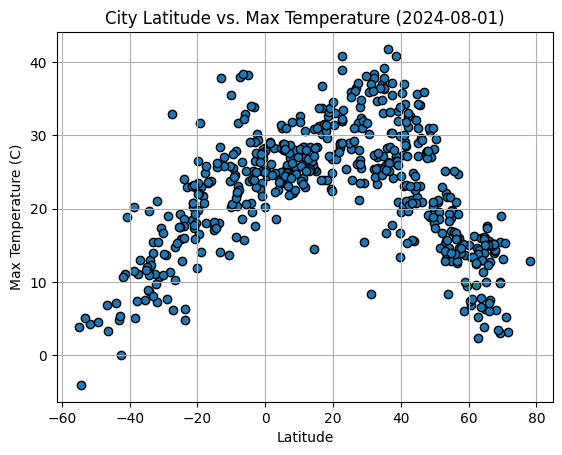

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-08-01)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

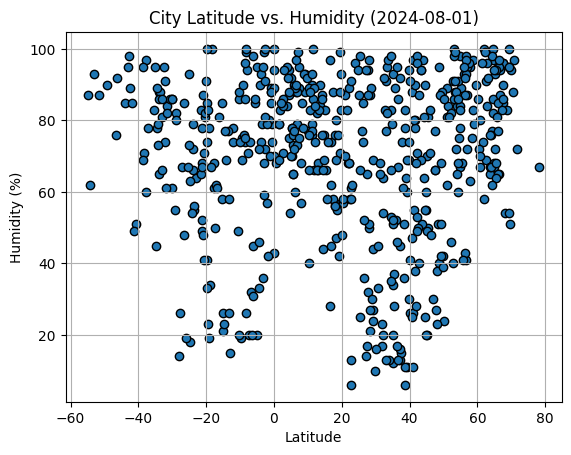

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-08-01)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

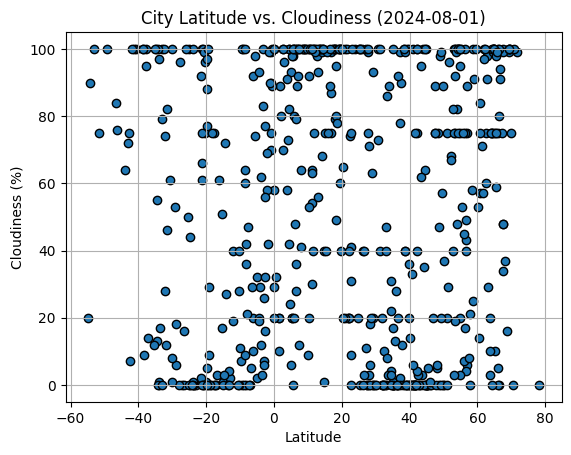

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-08-01)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

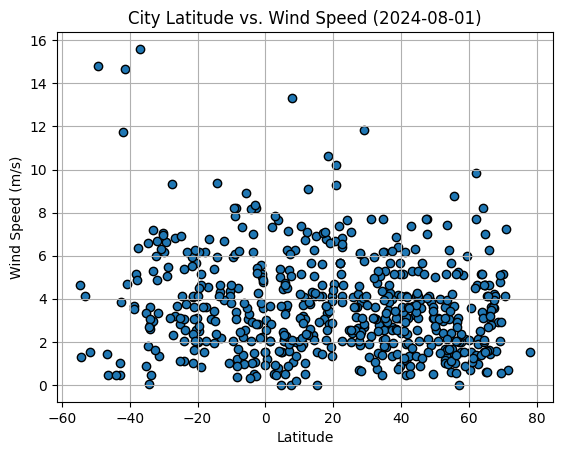

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-08-01)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
def lin_reg_plot(x_axis, y_axis):
    slope, int, r_value, p_value, std_err = linregress(x_axis, y_axis)
    fit = slope * x_axis + int
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
    print(f"The linear regression equation is: {line_eq}")
    print(f"The r^2 value is: {r_value**2}")
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis ,fit, color='red')
    plt.annotate(line_eq, color = 'red', xy=(x_axis.min(), y_axis.min()))
    plt.show()

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = []
for index, row in city_data_df.iterrows():
    if row['Lat'] >= 0:
        northern_hemi_df.append(row)

# Display sample data
northern_hemi_df = pd.DataFrame(northern_hemi_df)
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,polyarnyy,69.1989,33.4478,9.96,95,99,4.78,RU,1722543590
4,la passe,45.5549,-0.8967,23.13,81,0,3.95,FR,1722543592
6,kodiak,57.7900,-152.4072,14.73,63,0,1.54,US,1722543594
7,namsos,64.4662,11.4957,13.95,77,75,1.54,NO,1722543596
8,larkird,35.4894,66.6641,16.66,37,0,1.74,AF,1722543597


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = []
for index, row in city_data_df.iterrows():
    if row['Lat'] < 0:
        southern_hemi_df.append(row)

# Display sample data
southern_hemi_df = pd.DataFrame(southern_hemi_df)
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,12.95,88,0,3.60,ZA,1722543588
1,ushuaia,-54.8000,-68.3000,3.81,87,20,4.63,AR,1722543589
3,puerto ayora,-0.7393,-90.3518,26.98,85,70,4.80,EC,1722543591
5,greymouth,-42.4667,171.2000,-0.05,89,7,3.85,NZ,1722543593
11,invercargill,-46.4000,168.3500,3.34,92,76,0.45,NZ,1722543600


###  Temperature vs. Latitude Linear Regression Plot

The linear regression equation is: y = -0.25x + 32.79
The r^2 value is: 0.3872985237782653


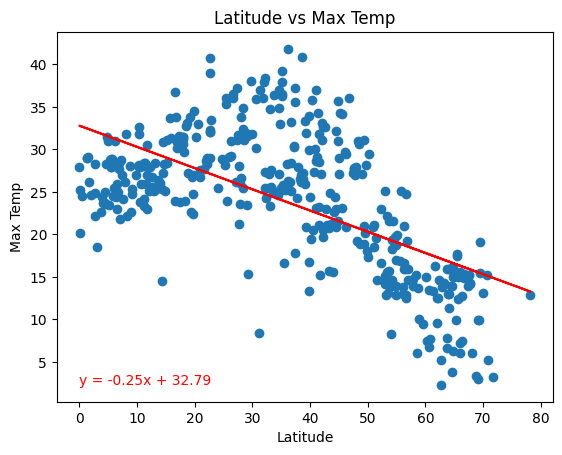

In [28]:
# Linear regression on Northern Hemisphere
plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df['Max Temp'])

The linear regression equation is: y = 0.48x + 28.62
The r^2 value is: 0.6204676722104062


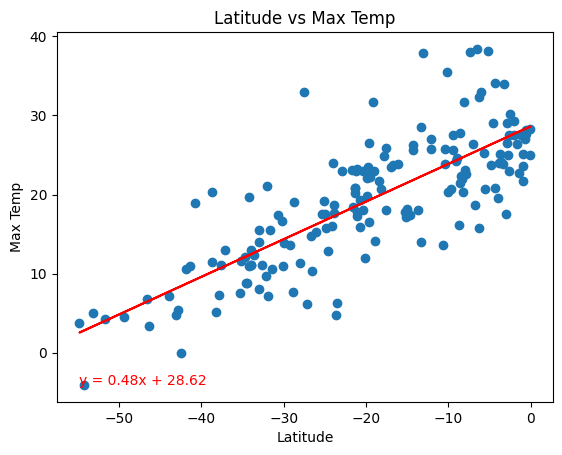

In [29]:
# Linear regression on Southern Hemisphere
plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** In the Southern hemisphere the Max temperature and latitude have a stronger correlation to each other than the northern hemisphere. The r-squared value of the southern hemsphere is 0.62 which is over 0.20 more than the northern hemisphere at 0.38. I also notice that the max temp and latitude in the northern hemisphere has an inveserse relationship. As the latitude increases the max temperature decreases. This is the opposite for the southern hemisphere. I am not surprised by this as cities closer to the equator are mostly warmer, whereas cities closer to the north pole are colder. 

### Humidity vs. Latitude Linear Regression Plot

The linear regression equation is: y = 0.05x + 67.64
The r^2 value is: 0.0021951047797349023


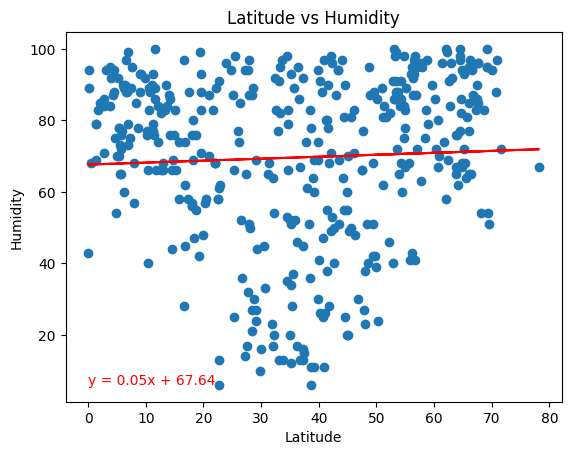

In [30]:
# Northern Hemisphere
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df['Humidity'])

The linear regression equation is: y = -0.22x + 64.83
The r^2 value is: 0.0170431337885584


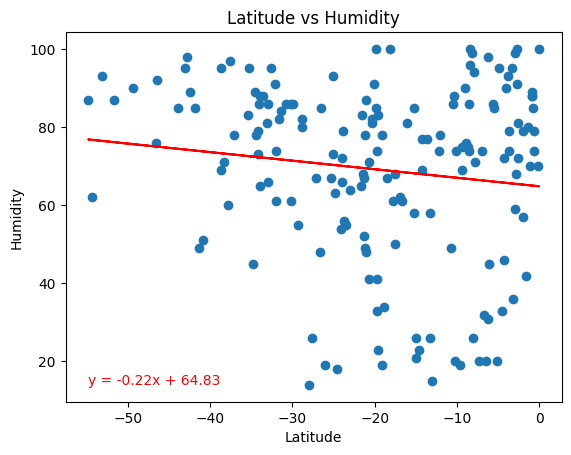

In [31]:
# Southern Hemisphere
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** Both of these showed a very small correlation and both values have almost zero importance to the change of the slope and do not impact that changes between the increases/decrease of both variables. Both graphs display points all over the place and do not tell a story between the two variables. 

### Cloudiness vs. Latitude Linear Regression Plot

The linear regression equation is: y = -0.17x + 60.24
The r^2 value is: 0.007650732410401543


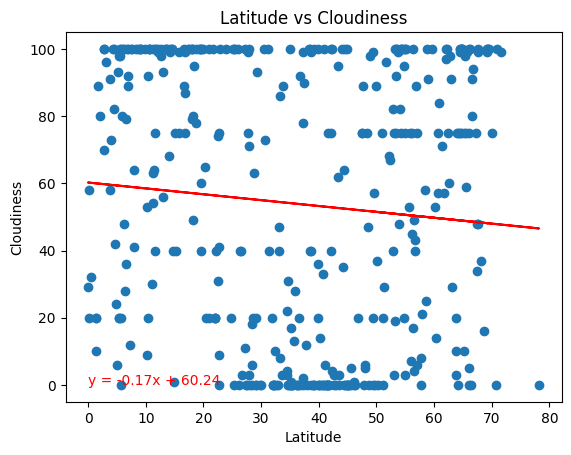

In [32]:
# Northern Hemisphere
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df['Cloudiness'])

The linear regression equation is: y = -0.38x + 37.61
The r^2 value is: 0.016788927683419816


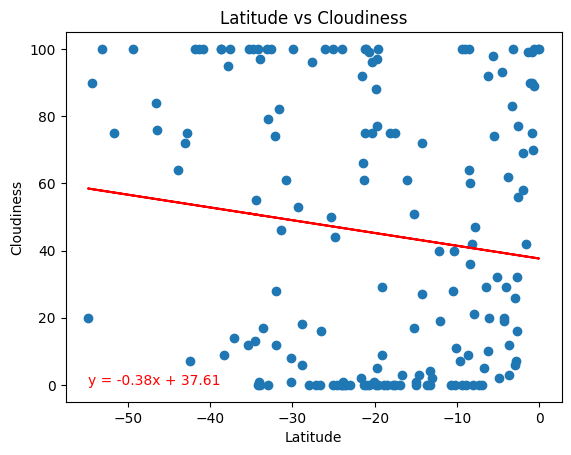

In [33]:
# Southern Hemisphere
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** Like the humidity plot, cloudiness is also all over the place and does not show a strong correlation to latitude. Both plots have individual points in very extreame locations and the line of best fit is in a location that is far from many points because of the wideness of spread between the points. So far the best coorelation has been latitude and max temperature. 

### Wind Speed vs. Latitude Linear Regression Plot

The linear regression equation is: y = -0.01x + 3.84
The r^2 value is: 0.008369341704453


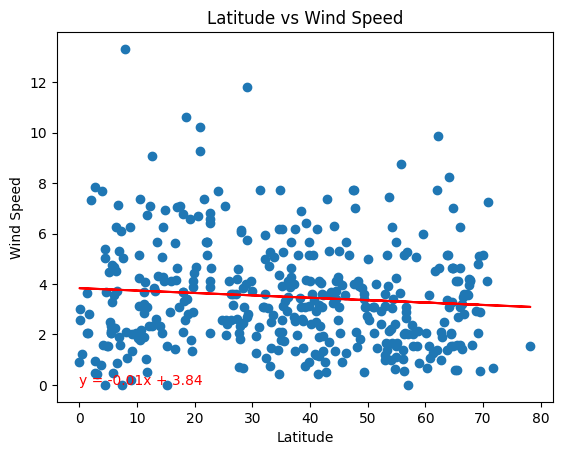

In [34]:
# Northern Hemisphere
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df['Wind Speed'])

The linear regression equation is: y = -0.02x + 3.7
The r^2 value is: 0.00830789361975056


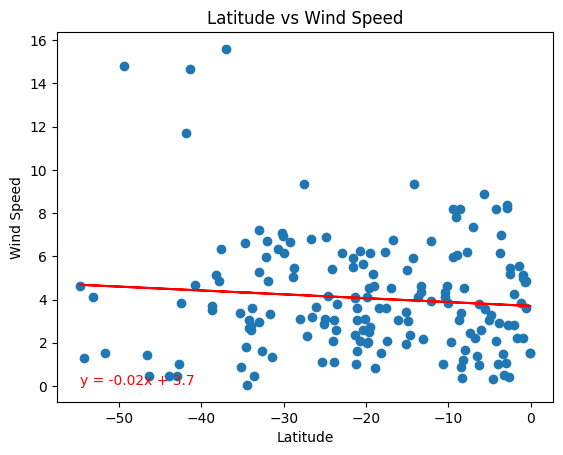

In [35]:
# Southern Hemisphere
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** Another 2 plots with very little correlation with each other. Most points sit below 10 for wind speed on both hemispheres with a couple of outliers. As the latitude increases on both sides the wind speed stay relatively the same as we can see from the slope being nearly 0 (-0.01 for northern hemisphere, -0.02 for southern hemisphere). After collecting the results from all of these graphs we can say that the Max temperature has the strongest correlation to latitude in both hemisphere with it being the strongest in the souther hemisphere. 